In [189]:
import pandas as pd
df = pd.read_csv('sales_prediction.csv')

In [191]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [192]:
#70% Test + 30% Train
#Target - Sales(Y)
#Objective - Predict Y given Input Attributes(X)
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
SEED = 42

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [194]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [195]:
#test_data = unseen data
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

In [196]:
#Data Pre-processing
#Making a copy of training_data
X_train_c = X_train.copy()


In [197]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [198]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [199]:
#Handle varying data types + Consider numerical data only
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [200]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [201]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [202]:
#Handle missing values from Item_Weight
import seaborn as sns
#Visualize wihout too many lines of code
import matplotlib.pyplot as plt

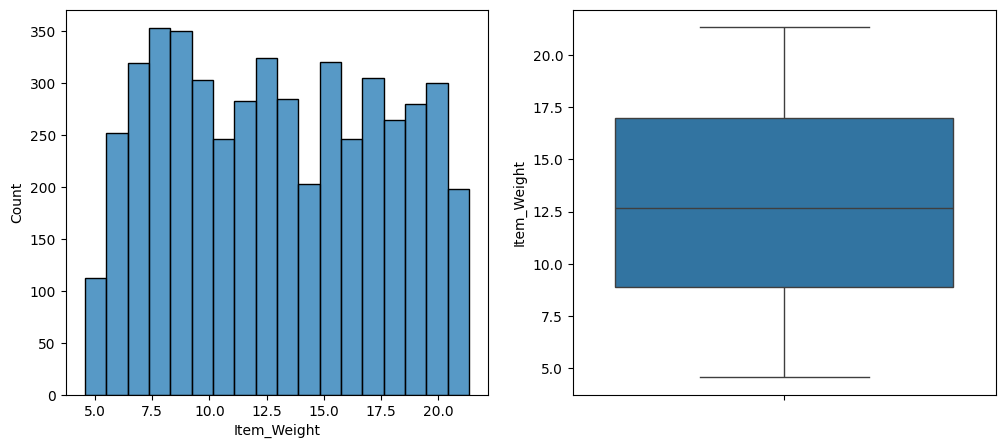

In [203]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
#1 row plot with 2 sub plots
#Analyse boxplot interpretation
sns.histplot(data = X_train_c, x = 'Item_Weight', ax = ax[0]);
sns.boxplot(data = X_train_c, y = 'Item_Weight', ax = ax[1]);

In [204]:
#Reusable function for visualizing generic data
def visualize_numeric_features(data_frame, col_name):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    sns.histplot(data = data_frame, x = col_name, ax = ax[0])
    sns.boxplot(data = data_frame, y = col_name, ax = ax[1])

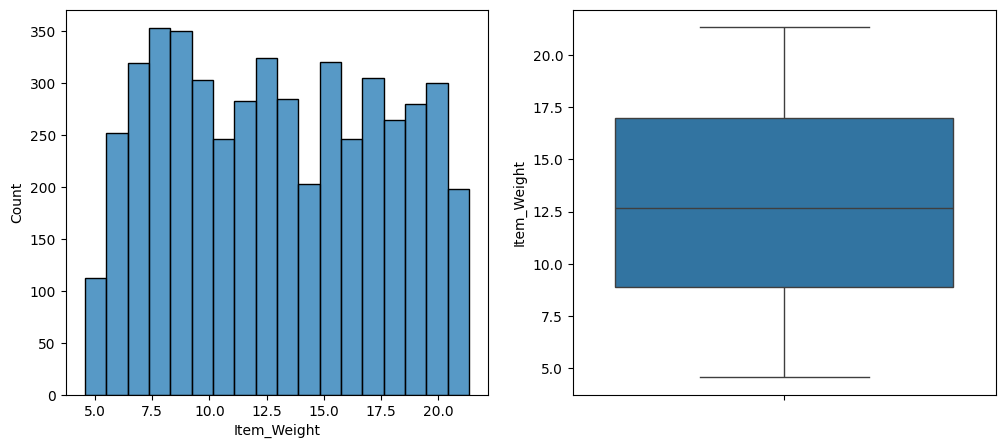

In [205]:
visualize_numeric_features(X_train_c, 'Item_Weight')

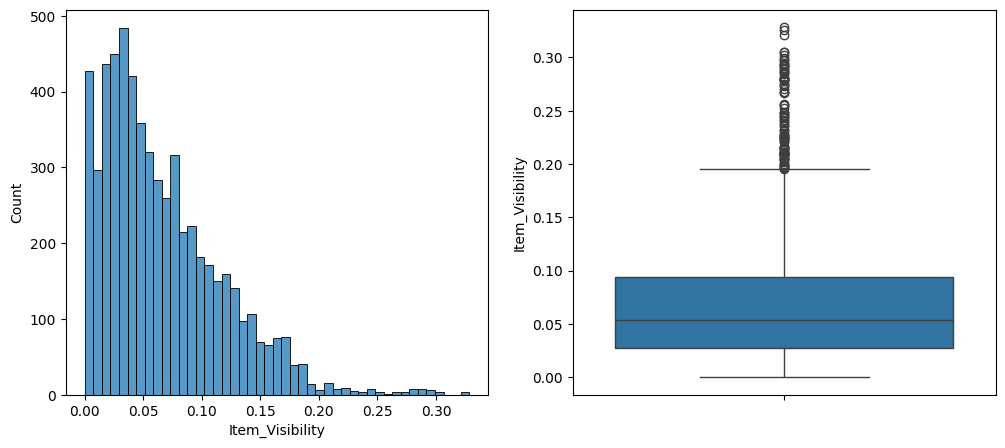

In [206]:
visualize_numeric_features(X_train_c, 'Item_Visibility')

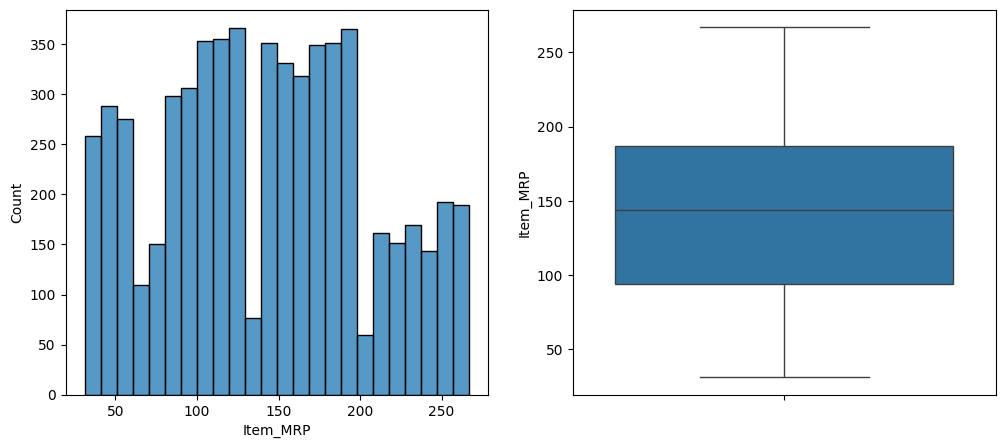

In [207]:
visualize_numeric_features(X_train_c, 'Item_MRP')

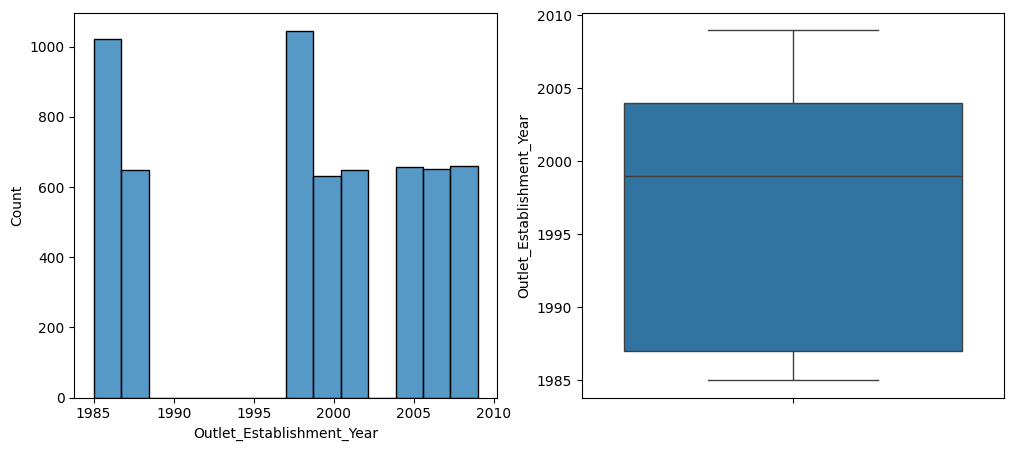

In [208]:
visualize_numeric_features(X_train_c, 'Outlet_Establishment_Year')

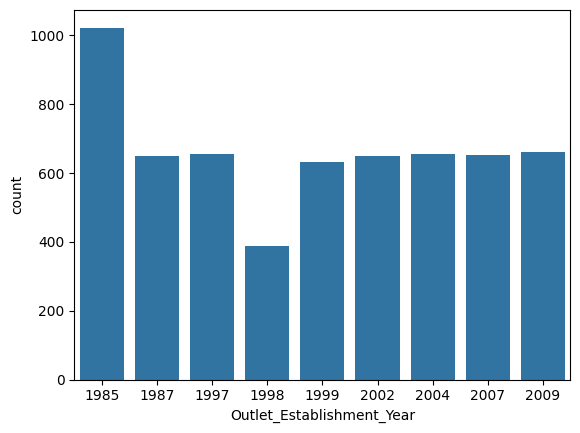

In [209]:
#Sales per outlet across time
sns.countplot(data = X_train_c, x = 'Outlet_Establishment_Year');

In [210]:
#Handle categorical features
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [211]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [212]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [213]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [214]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [215]:
#Need to standardize the attributes symoblizing the same value
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [216]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

In [217]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [218]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [219]:
#Feature Engineering
#Low level + duplicates --> High level Item types
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()
#Longer time of execution

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [220]:
X_train_c['Item_Identifier'].str[:2].value_counts()
#Slicing strings reduces time of exec

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [221]:
#Map Item_id to Item_Types
def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({'FD' : 'Food', 'NC' : 'Non_Consumables', 'DR' : 'Drink'})
    return data_frame

In [222]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [223]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [224]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by = ['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [225]:
#Estimate missing values by taking observations from previous data of the same name
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by = ['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [226]:
#Fill missing values using mapping of historical observations
#Fill new attributes with median values of identical d_type
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values = 'Item_Weight', index = 'Item_Identifier').reset_index()
#Item_Id becomes its own column with aggregate of Item_Weights
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]
#A good approach along. Similar perf to KNN neighbours.

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [227]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values = 'Item_Weight', index = 'Item_Type', aggfunc = 'median').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Type'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
ITEM_ID_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [228]:
def impute_item_weight(data_frame):
    data_frame.loc[:, 'Item_Weight'] =  data_frame.loc[:, 'Item_Weight'].fillna( data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    data_frame.loc[:, 'Item_Weight'] =  data_frame.loc[:, 'Item_Weight'].fillna( data_frame.loc[:, 'Item_Type'].map(ITEM_ID_WEIGHT_MAPPING))
    return data_frame

In [229]:
X_train_c = impute_item_weight(X_train_c)

In [230]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [231]:
#Handle Missing values in Outlet_Size
X_train_c.groupby(by = ['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [232]:
OUTLET_TYPE_SIZE_MAPPING = (
    X_train_c.groupby('Outlet_Type')['Outlet_Size']
    .agg(lambda x: x.mode()[0] if not x.isna().all() else 'Unknown')
    .to_dict()
)
X_train_c['Outlet_Size'] = X_train_c['Outlet_Size'].fillna(X_train_c['Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

In [233]:
def impute_outlet_size(data_frame):
    data_frame.loc[:, 'Outlet_Size'] =  data_frame.loc[:, 'Outlet_Size'].fillna( data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame

In [234]:
X_train_c = impute_outlet_size(X_train_c)

In [235]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [236]:
#Standardize Item_Fat_Content Category
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [237]:
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({'Low Fat' : 'Low_Fat', 'LF' : 'Low_Fat', 'reg' : 'Regular', 'low fat' : 'Low_Fat'})
    return data_frame

In [238]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [239]:
#Correct mismatched data. Item_Fat_Content with Non_Consumables
#A book can't have fat content
X_train_c.groupby(by = ['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [240]:
#Filter all such rows where Fat_Content is matched with Non_Consumables
X_train_c.loc[X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [241]:
#Correct the value to Non_Edible using a function
def correct_item_fat_content(data_frame):
    X_train_c.loc[X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edbile'
    return data_frame

In [242]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by = ['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edbile          1137
dtype: int64

In [259]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [261]:
#Training the original dataset
def prepare_dataset(data_frame):
    data_frame = create_item_type(data_frame)
    data_frame = impute_item_weight(data_frame)
    data_frame = impute_outlet_size(data_frame)
    data_frame = standardize_item_fat_content(data_frame)
    data_frame = correct_item_fat_content(data_frame)
    return data_frame

In [262]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [263]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [264]:
#Handle test dataset
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [265]:
cat_feats = X_train.select_dtypes(include = ['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Low_Fat,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [266]:
#Ignore unknown data from test
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [267]:
ohe_features_names = ohe.get_feature_names_out(input_features = cat_feats.columns)
ohe_features_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [268]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True) #drop = True removes old index as col in resulting df
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,12.80,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [269]:
cat_feats_train = X_train.select_dtypes(include = ['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_features_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [270]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis = 1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [271]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [272]:
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_features_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis = 1)
X_test_final = X_test_final[final_columns]
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.800,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

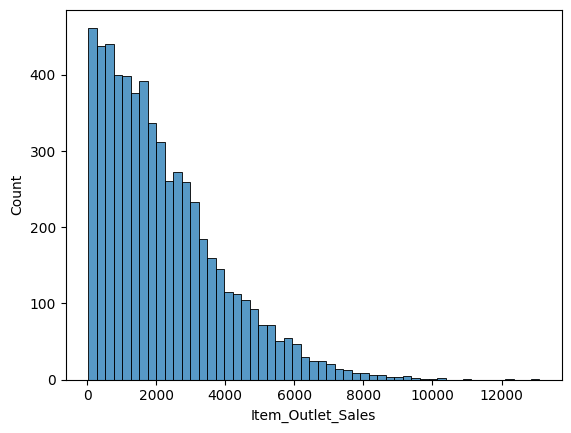

In [273]:
sns.histplot(y_train)

In [274]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor #New model that handles cat_variables natively like LGBM. Can pass as ohe too.
import xgboost as xgb
from lightgbm import LGBMRegressor 
from sklearn.model_selection import cross_validate
import numpy as np

In [275]:
def train_and_eval_model(model, X_train, y_train, cv = 5):
 cv_results = cross_validate(model, X_train, y_train, cv = cv, scoring = ('r2', 'neg_root_mean_squared_error'),) #Optional trailing comma for future editing
 print('Model:', model)
 r2_scores = cv_results['test_r2']
 print('R2 CV scores:', r2_scores)
 print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

 rmse_scores = cv_results['test_neg_root_mean_squared_error']
 rmse_scores = [-1 * score for score in rmse_scores]
 print('RMSE CV scores:', rmse_scores)
 print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))
    #R2 -> how well model explains variance in target variable -> higher better, RMSE -> avg prediction error -> lower better

In [276]:
rf = RandomForestRegressor(random_state = SEED) 
train_and_eval_model(model = rf, X_train = X_train_final, y_train = y_train) 

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57308982 0.53011579 0.54566503 0.55463339 0.52129904]
R2 CV scores mean / stdev: 0.5449606134427729 / 0.018251301155861873
RMSE CV scores: [1100.8709310572983, 1164.3899428479888, 1176.9136485708798, 1153.895420006276, 1200.677688648454]
RMSE CV scores mean / stdev: 1159.3495262261795 / 33.14035174902885


In [277]:
gb = GradientBoostingRegressor(random_state = SEED) 
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6069328  0.59062076 0.57517178 0.60799239 0.55187419]
R2 CV scores mean / stdev: 0.5865183838578515 / 0.0210887459808053
RMSE CV scores: [1056.3347131385897, 1086.8407892121134, 1138.054849929619, 1082.5672235079394, 1161.700742127153]
RMSE CV scores mean / stdev: 1105.099663583083 / 38.75266220629384


In [278]:
hgb = HistGradientBoostingRegressor(random_state = SEED) 
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6069328  0.59062076 0.57517178 0.60799239 0.55187419]
R2 CV scores mean / stdev: 0.5865183838578515 / 0.0210887459808053
RMSE CV scores: [1056.3347131385897, 1086.8407892121134, 1138.054849929619, 1082.5672235079394, 1161.700742127153]
RMSE CV scores mean / stdev: 1105.099663583083 / 38.75266220629384


In [375]:
import xgboost as xgb
SEED = 42
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
train_and_eval_model(model = xgr, X_train =  X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52085122 0.4916131  0.47338637 0.53222995 0.4471407 ]
R2 CV scores mean / stdev: 0.49304426721015754 / 0.030997944041630306
RMSE CV scores: [1166.2813824172804, 1211.156308342039, 1267.0757064521274, 1182.5617584250049, 1290.332388

In [ ]:
#Lower std_dev suggests that that model's overfitting is lesser (Learns patterns too well to training data making it too specific. Unbable to compute for generic new data)
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr, X_train =  X_train_final, y_train = y_train)

In [ ]:
#Are those many features necessary?
#Analysis without the Item_Id in the ohe_df + Comparison of model performance
X_train_copy = X_train.copy().drop(columns = 'Item_Identifier')
cat_cols = X_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude = ['object']).columns.tolist()
cat_cols, cal_cols

In [ ]:
#Native Handling - Pandas -> Cleaning of data, ML -> Encoding, Programming -> Memory alloc and dealloc, SQL -> join
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')#Grouping many attributes as a generic term. Object stores each unique seperately. Category stores in categories with internal integer codes.
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols + num_cols]
X_train_copy.info()
#Masking. Gives info about cat_features. Gives signal to Hist model. This helps it to transfrom the categorical features.
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
categorical_mask

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import HistGradientBoostingRegressor

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan), 
     make_column_selector(dtype_include="category")),
    remainder="passthrough"
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(random_state=42, categorical_features=categorical_mask)
)

train_and_eval_model(model=hgb, X_train=X_train_copy, y_train=y_train)


In [ ]:
#Results are not that better considering the internal native handling by the models. Further optimize by ohe without Item_Id on the same cat_features
cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis = 1)
X_train_final.head()

In [438]:
X_train_final.shape

(5966, 79)

In [ ]:
gb = GradientBoostingRegressor(random_state = SEED) 
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

In [ ]:
hgb = HistGradientBoostingRegressor(random_state = SEED) 
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
train_and_eval_model(model = xgr, X_train =  X_train_final, y_train = y_train)

In [ ]:
#Lower std_dev suggests that that model's overfitting is lesser (Learns patterns too well to training data making it too specific. Unbable to compute for generic new data)
lgbr = LGBMRegressor(random_state = SEED)
train_and_eval_model(model = lgbr, X_train =  X_train_final, y_train = y_train)

In [ ]:
#Comparison between xgb of Item_Id vs without Item_Id
#Item_Id included -> R2 CV scores: [0.58220727 0.55535747 0.5510974  0.58479037 0.53181554]
                    #R2 CV scores mean / stdev: 0.5610536082198088 / 0.019986735168143546
                    #RMSE CV scores: [1089.0519310204515, 1132.6833647998224, 1169.8564523677235, 1114.1440200520715, 1187.4157036093338]
                    #RMSE CV scores mean / stdev: 1138.6302943698806 / 35.91113145433715
#Without Item_Id -> R2 CV scores: [0.52419299 0.47204092 0.48406793 0.50327538 0.4728898 ]
                    #R2 CV scores mean / stdev: 0.4912934035054938 / 0.01993744785331013
                    #RMSE CV scores: [1162.2072077226408, 1234.2500537473834, 1254.1595166158986, 1218.6120461941516, 1259.9258882476076]
                    #RMSE CV scores mean / stdev: 1225.8309425055363 / 35.03126307189745
#It performs better even without Item_Id. R2 has increased abd RMSE has decreased.

In [ ]:
# Intelligent Feature Reduction + Feature Hashing -> Fixed vector size with [0, 1, 0, 1] unlike OHE [0, 0, 0, 1].
# OHE increases linearly with new columns.
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
# Convert the Item_Identifier column into an iterable of iterables
# Wrapping each string in a list makes it an iterable of iterables of strings
hashed_array = fh.transform(X_train['Item_Identifier'].apply(lambda x: [x]).values).toarray()
# Convert the hashed array into a DataFrame with column names
hashed_df = pd.DataFrame(hashed_array, columns=['H' + str(i) for i in range(hash_vector_size)])
hashed_df.head()

In [361]:
cat_feats = X_train.select_dtypes(include = ['object']).drop(columns = ['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)

In [363]:
num_feats_train = X_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_train = X_train.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_final = pd.concat([num_feats_train, hashed_df, X_train_cat_ohe], axis = 1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [365]:
gb = GradientBoostingRegressor(random_state = SEED) 
train_and_eval_model(model = gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60237882 0.58520358 0.57307013 0.62019221 0.56006782]
R2 CV scores mean / stdev: 0.5881825142473827 / 0.021231344822612734
RMSE CV scores: [1062.4363054706969, 1094.008055079378, 1140.866382738536, 1065.5885765215658, 1151.0313555726552]
RMSE CV scores mean / stdev: 1102.7861350765663 / 37.058139086644964


In [366]:
#Observing, the RMSE has reduced and R2 has increased compared to the results wihout Item_Id
#Repeat for Test_Data
hashed_array_test = fh.transform(X_test['Item_Identifier'].apply(lambda x: [x]).values).toarray()
hashed_test_df = pd.DataFrame(hashed_array_test, columns=['H' + str(i) for i in range(hash_vector_size)])
hashed_test_df.head()
num_feats_test = X_test.select_dtypes(exclude = ['object']).reset_index(drop = True)
cat_feats_test = X_test.select_dtypes(include = ['object']).drop(columns = 'Item_Identifier')
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_feature_names)
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis = 1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.800,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [367]:
X_test_final.shape

(2557, 79)

In [424]:
import xgboost as xgb
SEED = 42
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
xgr.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [426]:
y_pred = xgr.predict(X_test_final)

In [428]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error as root_mean_squared_error 

In [418]:
print('R2 Score', r2_score(y_test, y_pred))
print('RMSE Score', mean_squared_error(y_test, y_pred, squared = False))

R2 Score 0.5414120684015569
RMSE Score 1133.3586493839039


C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


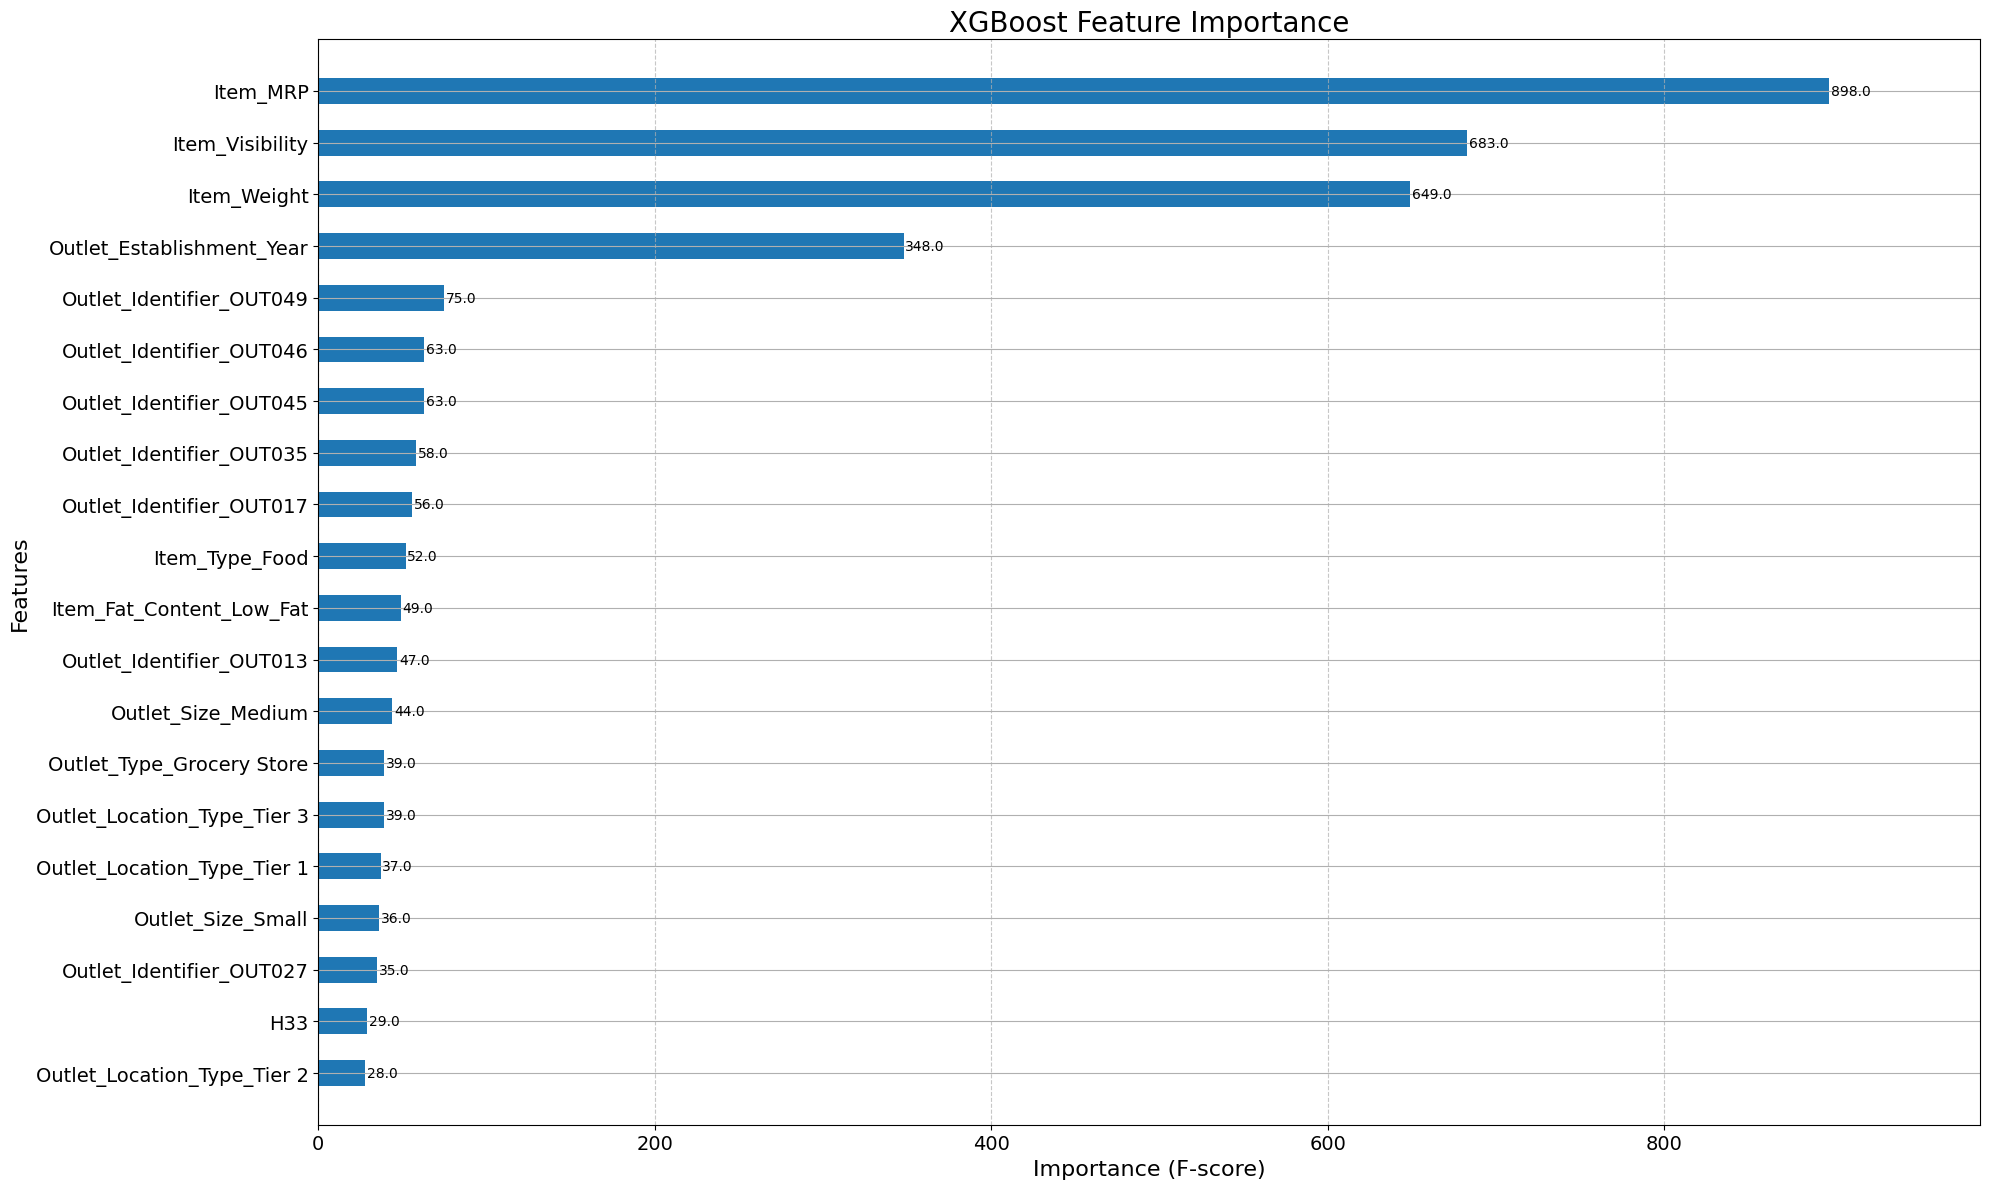

In [440]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
plot_importance(xgr, ax=ax, importance_type='weight', max_num_features=20, height=0.5)
ax.set_title('XGBoost Feature Importance', fontsize=20)
ax.set_xlabel('Importance (F-score)', fontsize=16)
ax.set_ylabel('Features', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()